# Multicollinearity — Car Fuel Example
# 1. What is Multicollinearity?
Multicollinearity happens when two or more predictors (independent variables) in a regression are highly correlated.

They basically give the same information to the model.
#Example in Cars
Predictor 1: Distance driven (km)

Predictor 2: Fuel consumed (liters)
But… Fuel = Distance ÷ 10.
So they are perfectly correlated!


In [12]:
import pandas as pd

# Create simple dataset
data = pd.DataFrame({
    "Distance": [100, 200, 300, 400],
    "Fuel": [10, 20, 30, 40],
    "FuelCost": [20, 40, 60, 80]
})

data


,Distance,Fuel,FuelCost
0,100,10,20
1,200,20,40
2,300,30,60
3,400,40,80


# 2. Why is it a Problem?
Linear regression assumes predictors are independent.
If they are not:

Coefficients become unstable

Interpretation is messy ("holding others constant" is impossible)

p-values become unreliable


In [18]:
import warnings
import statsmodels.api as sm

# Ignore specific statsmodels warnings
warnings.filterwarnings("ignore")

# Regression with BOTH Distance and Fuel
X_both = sm.add_constant(data[["Distance", "Fuel"]])
y = data["FuelCost"]

model_both = sm.OLS(y, X_both).fit()
model_both.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FuelCost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.516e+30
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           6.59e-31
Time:                        10:18:55   Log-Likelihood:                 119.50
No. Observations:                   4   AIC:                            -235.0
Df Residuals:                       2   BIC:                            -236.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.553e-15   4.45e-14     -0.080      0.944   -1.95e-13    1.88e-13
Distance       0.1980   1.61e-16   1.23e+15      0.000       0.198       0.198
Fuel           0.0198   1.61e-17   1.23e+15      0.000       0.020       0.020
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.139
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.302
Skew:                          -0.244   Prob(JB):                        0.860
Kurtosis:                       1.745   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Output will show strange coefficients:

Distance ≈ 0.198

Fuel ≈ 0.0198
Doesn’t make sense, because we know cost should be 2 * Fuel.
The model is confused since Distance and Fuel always move together.



# 3. Detecting Multicollinearity
Scatterplot

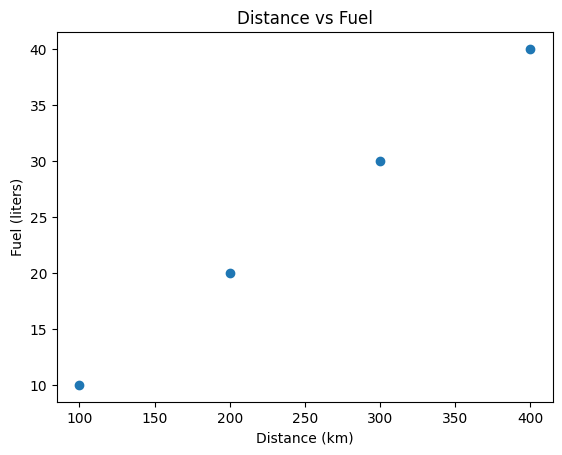

In [14]:
import matplotlib.pyplot as plt

plt.scatter(data["Distance"], data["Fuel"])
plt.xlabel("Distance (km)")
plt.ylabel("Fuel (liters)")
plt.title("Distance vs Fuel")
plt.show()


You’ll see a perfect line → means perfect correlation.
Correlation Matrix

In [15]:
data[["Distance", "Fuel"]].corr()


,Distance,Fuel
Distance,1.0,1.0
Fuel,1.0,1.0


Perfect correlation = multicollinearity.

# 4. Fixing the Problem
Use only one predictor

const   -1.421085e-14
Fuel     2.000000e+00
dtype: float64


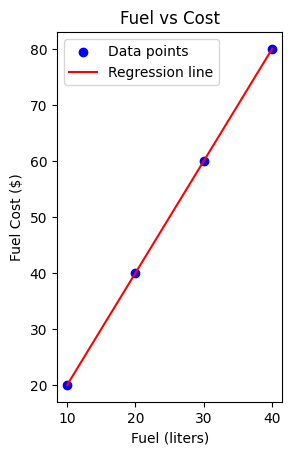

In [16]:
# Using only Fuel
X_fuel = sm.add_constant(data[["Fuel"]])
model_fuel = sm.OLS(y, X_fuel).fit()
print(model_fuel.params)

# Fuel vs Cost
plt.subplot(1, 2, 1)
plt.scatter(data["Fuel"], y, color="blue", label="Data points")
plt.plot(data["Fuel"], model_fuel.predict(X_fuel), color="red", label="Regression line")
plt.xlabel("Fuel (liters)")
plt.ylabel("Fuel Cost ($)")
plt.title("Fuel vs Cost")
plt.legend()


Clear: Every liter costs $2

const      -1.065814e-14
Distance    2.000000e-01
dtype: float64


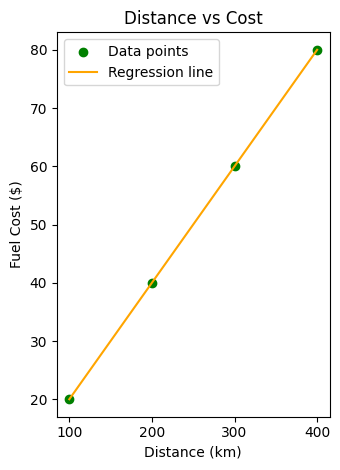

In [17]:
# Using only Distance
X_dist = sm.add_constant(data[["Distance"]])
model_dist = sm.OLS(y, X_dist).fit()
print(model_dist.params)


# Distance vs Cost
plt.subplot(1, 2, 2)
plt.scatter(data["Distance"], y, color="green", label="Data points")
plt.plot(data["Distance"], model_dist.predict(X_dist), color="orange", label="Regression line")
plt.xlabel("Distance (km)")
plt.ylabel("Fuel Cost ($)")
plt.title("Distance vs Cost")
plt.legend()

plt.tight_layout()
plt.show()

Also clear: Every km costs $0.20.

# Key Difference

Regression graphs (Cost vs Fuel/Distance): Explain/predict Cost using regression.

Scatter plot (Distance vs Fuel): Just a descriptive relationship, no regression model.

# Think of it like this:

Regression = "Can I predict Cost if I know Fuel?"

Scatter (Distance vs Fuel) = "How much Fuel do I use for each Distance?"

#5. Analogy
Imagine you ask friends about the weather:

Friend A: “It’s 25°C”

Friend B: “It’s 77°F”

They’re saying the same thing. That’s multicollinearity → you don’t need both.
But if Friend C says: “It’s windy”  
That’s new information. Useful predictor!

# Summary

Multicollinearity = predictors are too correlated.

Problem = unstable coefficients, messy interpretation, unreliable p-values.

Detect = scatterplots, correlation matrix.

Fix = drop redundant predictors, combine them, or use advanced methods (Ridge, PCA).